In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pylab as plt
%matplotlib inline
import numpy as np
from time import clock
import pickle
from time import clock
#import community as community_louvain
import pandas as pd
import seaborn as sns
import csv 

# Drawing

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pylab as plt
%matplotlib inline
import numpy as np
from time import clock
import pickle
from time import clock
#import community as community_louvain
import pandas as pd
import seaborn as sns

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos
import networkx.algorithms.community as nxcom
with open('memdict_risolate.pickle', 'rb') as handle:
    r = pickle.load(handle)
#g = nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819_sub.txt', nodetype=str, data=(('weight',float),))
g =  nx.karate_club_graph()
M = dict(g.degree())
g.remove_nodes_from(node for node, degree in M.items() if degree <2) 
partition = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)
pos = community_layout(g, partition)
nx.draw(g, pos, node_color=list(partition.values())); plt.show()

IndexError: list index out of range

In [ ]:
G_social = nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819.txt', nodetype=str, data=(('weight',float),))
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b) 

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
# external edges
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    G_social, pos=pos, 

    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

In [25]:
# Set node and edge communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
set_node_community(G_karate, communities)
set_edge_community(G_karate)

node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

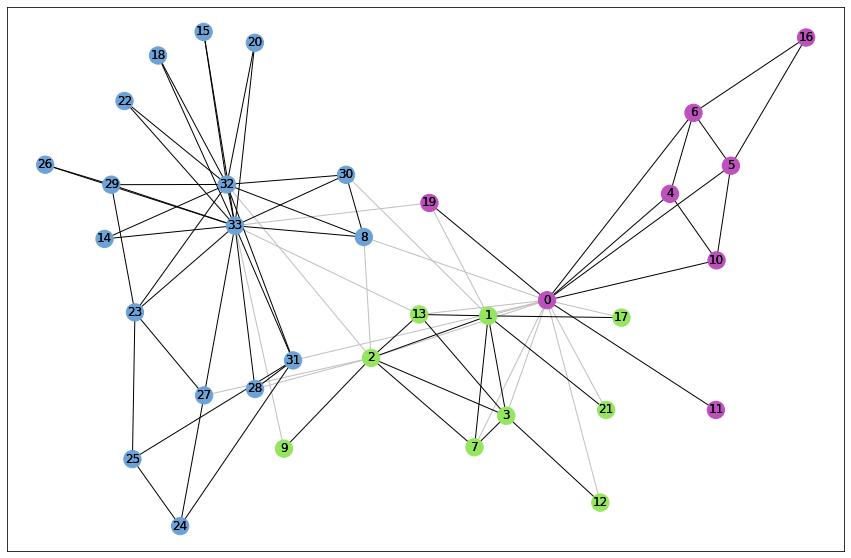

In [26]:
    karate_pos = nx.spring_layout(G_karate)

    plt.rcParams.update({'figure.figsize': (15, 10)})
    # Draw external edges
    nx.draw_networkx(
        G_karate,
        pos=karate_pos,
        node_size=0,
        edgelist=external,
        edge_color="silver")
    # Draw nodes and internal edges
    nx.draw_networkx(
        G_karate,
        pos=karate_pos,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color)

In [ ]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)

In [27]:
G_social = g = nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819.txt', nodetype=str, data=(('weight',float),))

KeyboardInterrupt: 

# NMI

In [97]:
def writeMem(InvMem, File): # to convert the file as data files so we can use it for NMI
    """
    the nodes in each community will list in lines:
    1 7 9 10
    2 3 8
    4 5 6
    """
    with open(File,'w') as f:
        w = csv.writer(f, delimiter =' ')
        w.writerows(InvMem.values())

In [88]:
File = 'tmp.dat'

In [92]:
x = LRN[0]

In [96]:
with open(File,'w') as f:
    w = csv.writer(f, delimiter =' ')
    w.writerows(x)

# RNBRW+Louvain

In [5]:
with open('mem_luv_rnbrw.pickle', 'rb') as handle:
    LRN = pickle.load(handle) # LRN is the membership dictionary
    #each value is an array of nodes on r

In [98]:
writeMem(LRN, 'mmem_luv_rnbrw.dat') # write it in the data format

In [99]:
%%bash
./mutual mmem_luv_rnbrw.dat mmem_luv_rnbrw.dat

mutual3:	0.925


In [6]:
mem_rnbrw_size={}
for k , v in LRN.items():
    mem_rnbrw_size[k] = len(LRN[k])  

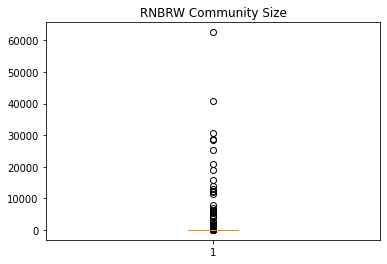

In [8]:
 datas =  mem_rnbrw_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('RNBRW Community Size')
ax1.boxplot(datas)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("Boxplot_rnbrwL.pdf") #Saving the plot
plt.show()

In [30]:
#RNBRW
RNB=[]
for k, v in mem_rnbrw_size.items():
    RNB.append(mem_rnbrw_size[k])

No handles with labels found to put in legend.


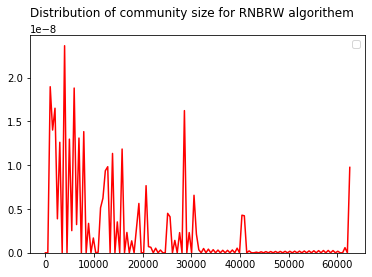

In [60]:
sns.kdeplot(RNB, shade = False, color='Red')
plt.suptitle("Distribution of community size for RNBRW algorithem")
plt.savefig('rnbrwlouvain_Distribution')
plt.legend()

# Louvain

In [9]:
with open('memdict_risolate.pickle', 'rb') as handle:
    r = pickle.load(handle)
    #each value is an array of nodes on r

In [3]:
writeMem(r, 'memdict_risolate.dat') # write it in the data format

NameError: name 'writeMem' is not defined

In [107]:
%%bash
./mutual memdict_risolate.dat mmem_luv_rnbrw.dat

mutual3:	0.685537


In [11]:
mem_size={}
for k , v in r.items():
    mem_size[k] = len(r[k])  

In [29]:
#Louvain
x=[] 
for k , v in mem_size.items():
    x.append(mem_size[k]) 

    

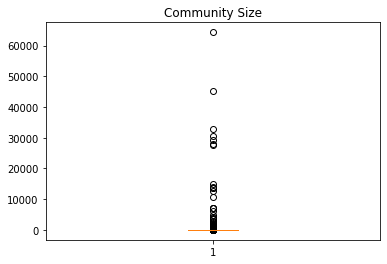

In [13]:
data =  mem_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')
ax1.boxplot(data)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("Boxplot.pdf") #Saving the plot
plt.show()

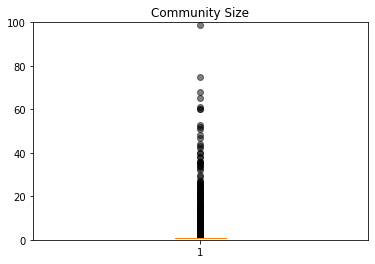

In [14]:
data =  mem_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')

ax1.set_ylim([0,100])
bp=ax1.boxplot(data, showbox=True, sym='k.')

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("Boxplotzoom.pdf") #Saving the plot

plt.show()

In [93]:
Resolution_Limit= np.sqrt(30201802*2)
print("Resolution Limit:", Resolution_Limit)

Resolution Limit: 7771.975553229693


In [75]:
L1=Louvain.count(1)

In [76]:
R1 =RNBRW_L.count(1)

In [44]:
Louvain.count(2)

11046

In [95]:
count_R = 0
for i in RNBRW_L: 
    if i < Resolution_Limit : 
        count_R = count_R + 1

In [94]:
count_L = 0
for i in Louvain: 
    if i < Resolution_Limit : 
        count_L = count_L + 1

In [96]:
count_L-L1

13898

In [97]:
count_R-R1

13594

[Text(1, 0, 'Louvain'), Text(2, 0, 'RNBRW')]

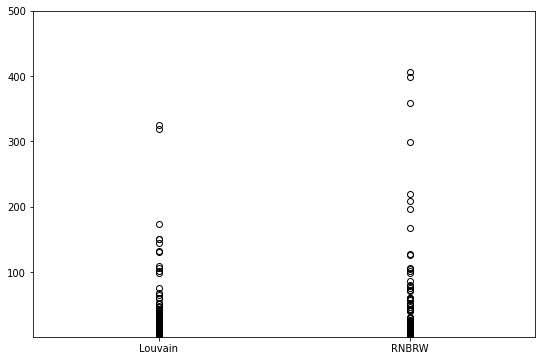

In [115]:
Louvain = list(mem_size.values())
RNBRW_L = list(mem_rnbrw_size.values())
data_to_plot = [Louvain, RNBRW_L]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
ax.set_ylim([1,500])
# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
ax.set_xticklabels(['Louvain','RNBRW'])

[Text(1, 0, 'Louvain'), Text(2, 0, 'RNBRW')]

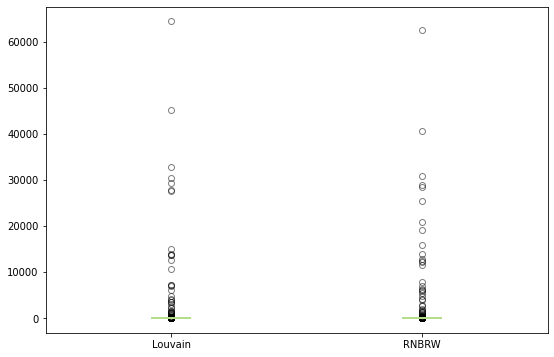

In [112]:
## add patch_artist=True option to ax.boxplot() 
## to get fill color
Louvain = list(mem_size.values())
RNBRW_L = list(mem_rnbrw_size.values())
data_to_plot = [Louvain, RNBRW_L]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot

bp = ax.boxplot(data_to_plot, patch_artist=True)


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
# Save the figure
fig.savefig('fig22.png', bbox_inches='tight')
ax.set_xticklabels(['Louvain','RNBRW'])



In [108]:
sns.boxplot(x="continent", y="lifeExp", data=data_to_plot)
sns.stripplot(x="continent", y="lifeExp", data=data_to_plot)

AttributeError: 'list' object has no attribute 'get'

# CNM

In [4]:
G = nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819.txt', nodetype=str, data=(('weight',float),))

In [ ]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
plt.show()
plt.savefig("Git.png", format="PNG")

In [ ]:
#CNM
from networkx.algorithms.community import greedy_modularity_communities
partition = greedy_modularity_communities(G, weight='weight')
#partition returns a list of frozensets of nodes in each communities
i = 0; CNM = dict() #initiating a counter for comunity number with a dictionary CNM={comunity 1:[nodes]} like a dict invert
for fs in partition: #for each frozensets
    CNM[i] = list(fs) #key = comunity number, value = frozensets converted to list
    i += 1 



In [10]:
a_file = open("CNM.pkl", "wb")
pickle.dump(CNM, a_file)
a_file.close()

In [11]:
a_file = open("CNM.pkl", "rb")
output = pickle.load(a_file)
print(output)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [108]:
writeMem(CNM, 'CNM.dat') # write it in the data format

In [110]:
%%bash
./mutual CNM.dat memdict_risolate.dat

mutual3:	0.206433


In [112]:
%%bash
./mutual CNM.dat mmem_luv_rnbrw.dat

mutual3:	0.219326


In [25]:
CNM_size={}
for k , v in CNM.items():
    CNM_size[k] = len(CNM[k])  

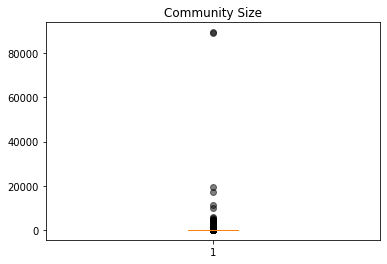

In [21]:
data =  CNM_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')

#ax1.set_ylim([0,100])
bp=ax1.boxplot(data, showbox=True, sym='k.')

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("BoxplotCNM.pdf") #Saving the plot

plt.show()

In [29]:
a=[]
for k, v in CNM_size.items():
    a.append(CNM_size[k])

No handles with labels found to put in legend.


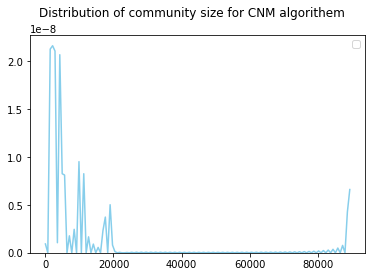

In [53]:

#sns.distplot(a, color='green')
sns.kdeplot(a, shade = False, color='skyblue')
plt.suptitle("Distribution of community size for CNM algorithem")
plt.savefig('CNMDistribution')
plt.legend()

No handles with labels found to put in legend.


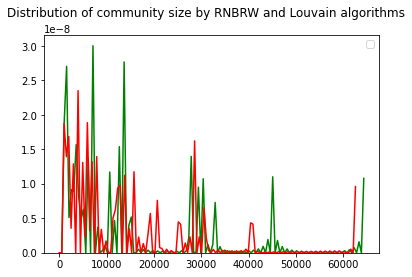

In [117]:
#sns.distplot(a, color='green')
sns.kdeplot(x, shade = False, color='green', bw=1.5)#Louvain
#sns.kdeplot(a, shade = False, color='purple')#CNM
sns.kdeplot(RNB, shade = False, color='red', bw= 1.5)# RNBRW+Louvain

plt.suptitle("Distribution of community size by RNBRW and Louvain algorithms")
plt.savefig('Distributions ofcommunity size of  RNBRW+Louvain')
plt.legend()

In [63]:
#source: https://graphsandnetworks.com/community-detection-using-networkx/

import networkx as nx
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            #Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            #External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)    

set_edge_community(G)

#Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]

KeyError: 'community'

In [ ]:

with open('memdict_risolate.pickle', 'rb') as handle:
    r = pickle.load(handle)
n=[]
for k, v in r.items():
    n.append(r[k])    
communities = n
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(G, communities)

    node_color = [get_color(G.nodes[v]['community'])for v in G.nodes]
pos = nx.spring_layout(G, k=0.1)
# external edges
nx.draw_networkx(
    G, 
    pos=pos, 
    node_size=0, 
    #edgelist=external, 
    #edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    G, pos=pos, 
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

In [66]:
len(mem_size)

275275

In [6]:
print(len(r.values()))
print(len(r.keys()))
#275000

275275
275275


In [9]:
# values of  key(community i)=r[i]
# for each community 
d = { 1 : ['z','a',"nmn"], 
2 :'b', 
3 :  ['am'], 
4 : ['nm', 'gbn'] } 
m_hist={}
for k , v in d.items():
    m_hist[k] = len(d[k])  
rm = []k,;/l;                                                                                 ' 'gf
l;l;,,,
for i in d.values():
    rm.append(i)    

SyntaxError: invalid syntax (<ipython-input-9-035f3a4ec502>, line 10)

In [7]:
x= []
for i in mem_size.values():
    x.append(i)

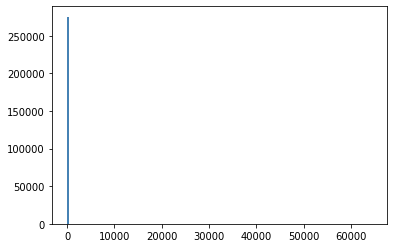

In [11]:
num_bins =150
#, num=num_bins) #<-- Change here.  Note the use of ravel.
plt.hist(x, bins=np.linspace(np.min(x), np.max(x), num= num_bins), color='steelblue')
plt.show()

In [12]:
from scipy import stats
stats.describe(x)


DescribeResult(nobs=275275, minmax=(1, 64362), mean=2.5430460448642265, variance=43407.942118310806, skewness=203.29320001665891, kurtosis=49074.35023016333)

In [111]:
df

,0,1,2,3
0,1.2,2.3,3.0,4.5
1,1.1,2.2,2.9,NaN


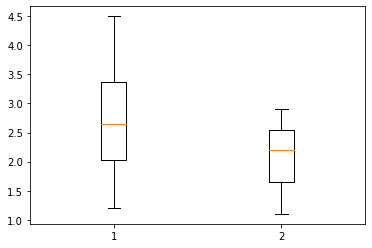

In [104]:
import matplotlib.pyplot as plt
x = [[1.2, 2.3, 3.0, 4.5],
     [1.1, 2.2, 2.9]]
plt.boxplot(x)
plt.show()

In [28]:
d = { 'A' : [1, 2, 3, 4, 5, 6, 7, 8, 9], 
'B' : 34, 
'C' : 12, 
'D' : [7, 8, 9, 6, 4] } 
  
count = 0
for l in d.values():
    for i in l: count += 1

TypeError: 'int' object is not iterable

In [1]:
G = nx.read_edgelist('edgelist_0819.txt', nodetype=str, data=(('weight',float),))

NameError: name 'nx' is not defined

In [10]:
G.number_of_edges() 

30201818

In [11]:
G.number_of_nodes()

700053

In [43]:
g.number_of_edges()

30201802

In [57]:
M = dict(G.degree())

In [127]:
import collections

In [128]:
def plotDegDistLogLog(G, loglog = True):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    frac = [n for n in cnt]
    fig, ax = plt.subplots()
    plt.plot(deg, frac, 'o')
    if loglog:
        ax.set_yscale('log', nonposy='clip')
        ax.set_xscale('log', nonposx='clip')
    plt.ylabel("Number of nodes")
    plt.xlabel("Degree")
    plt.savefig('Degree Dist.pdf')

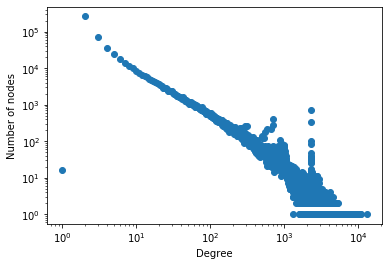

In [129]:
# Degree Distribution
plotDegDistLogLog(G, loglog = True)

In [2]:
# Isolate the sequence of degrees
degree_sequence = list(G.degree())

NameError: name 'G' is not defined

In [59]:
G.remove_nodes_from(node for node, degree in M.items() if degree <2) 

In [65]:
remove = [node for node,degree in M.items() if degree <2]

In [66]:
remove

[]

In [64]:
G.remove_nodes_from(remove)

KeyboardInterrupt: 

In [77]:
#plt.hist(dict(G.degree()).values(), bins = 10)
 list(d for n, d in G.in_degree([1, 3]))

IndentationError: unexpected indent (<ipython-input-77-b65944e34d45>, line 2)

In [10]:
from graphviz import Digraph
import pydotplus

dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

print(dot.source)
dot.render('test-output/round-table.gv', view=True)

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


'test-output/round-table.gv.pdf'

In [11]:
import pygraphviz as pgz

In [39]:
G.number_of_edges()

30201802

In [2]:
import networkx as nx

In [18]:
K = nx.karate_club_graph()

In [11]:
pgz.graphviz?

In [ ]:
pydot_layout(G[, prog, root])

# Solution

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [3]:
nx.draw(G, pos=graphviz_layout(G), node_size=300, cmap=plt.cm.Blues, node_color=colors,  prog='dot')
plt.savefig('Githubnetwork.pdf')
plt.show()
 #node_color=range(len(G))


NameError: name 'G' is not defined

In [92]:
Resolution_Limit= np.sqrt(30201802*2)
print("Resolution Limit:", Resolution_Limit)

Resolution Limit: 7771.975553229693
